In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 1 ) recreating the diffusions from the raw data


In [2]:
import matplotlib.pyplot as plt
import numpy as np


custom_style = {
    # Font sizes
    "axes.labelsize": 25,
    "axes.titlesize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,

    # Line and marker styles
    "lines.linewidth": 3,
    "lines.markersize": 8,
    "lines.color": "black",
    "errorbar.capsize": 5,

    # Axes & spines
    "axes.edgecolor": "black",
    "axes.linewidth": 2,

    # Tick styling
    "xtick.color": "black",
    "ytick.color": "black",
    "xtick.major.width": 1.2,
    "ytick.major.width": 1.2,

    # Grid
    "axes.grid": True,
    "grid.color": "gray",
    "grid.linewidth": 0.7,
    "grid.linestyle": "--",
    "grid.alpha": 0.6,

    # Figure settings
    "figure.figsize": (12, 8),
    "figure.dpi": 300,
    "figure.facecolor": "white"
}


plt.rcParams.update(custom_style)


In [3]:

path_to_data="./final_data"

In [5]:
import pandas as pd
df = pd.read_csv(os.path.join(path_to_data,"raw_data_encrypted_final.csv.zip"))
df.head()

,user_hashed,experience,commit_id,project,date,imports,imports_commit,year_quarter,ai_share,gender,quarter,file_name_encrypted,function_modified_names_encrypted
0,++8U+mb4HQ1aqI/CNF35Hw==,3,ebc25bf0190070cc6a70c464085898e42dfb444a0d644b...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-10 13:45:23,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN
1,++8U+mb4HQ1aqI/CNF35Hw==,3,79e305de1e6a5474231fb96a11fa5f77114a10b53f2df7...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-12 07:51:10,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN
2,++8U+mb4HQ1aqI/CNF35Hw==,3,91788ecf418e2614469bcd6c89e99f661fc0fc562bc6ab...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-13 08:08:58,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN
3,++8U+mb4HQ1aqI/CNF35Hw==,3,7218c9b719c898e94f460644489f11cf9a79bdf652140e...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-14 20:02:12,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN
4,++8U+mb4HQ1aqI/CNF35Hw==,3,66bf16a105220733f359f2374d681c87d40b9cacaed60a...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-27 16:49:52,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN


In [6]:
df.head()

,user_hashed,experience,commit_id,project,date,imports,imports_commit,year_quarter,ai_share,gender,quarter,file_name_encrypted,function_modified_names_encrypted
0,++8U+mb4HQ1aqI/CNF35Hw==,3,ebc25bf0190070cc6a70c464085898e42dfb444a0d644b...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-10 13:45:23,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN
1,++8U+mb4HQ1aqI/CNF35Hw==,3,79e305de1e6a5474231fb96a11fa5f77114a10b53f2df7...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-12 07:51:10,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN
2,++8U+mb4HQ1aqI/CNF35Hw==,3,91788ecf418e2614469bcd6c89e99f661fc0fc562bc6ab...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-13 08:08:58,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN
3,++8U+mb4HQ1aqI/CNF35Hw==,3,7218c9b719c898e94f460644489f11cf9a79bdf652140e...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-14 20:02:12,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN
4,++8U+mb4HQ1aqI/CNF35Hw==,3,66bf16a105220733f359f2374d681c87d40b9cacaed60a...,AR0U1rQjnSK2Gpo4sUugqK60fr+B3obmYU8Pet4WCCo=,2019-11-27 16:49:52,NaN,NaN,2019Q4,NaN,NaN,2019Q4,NaN,NaN


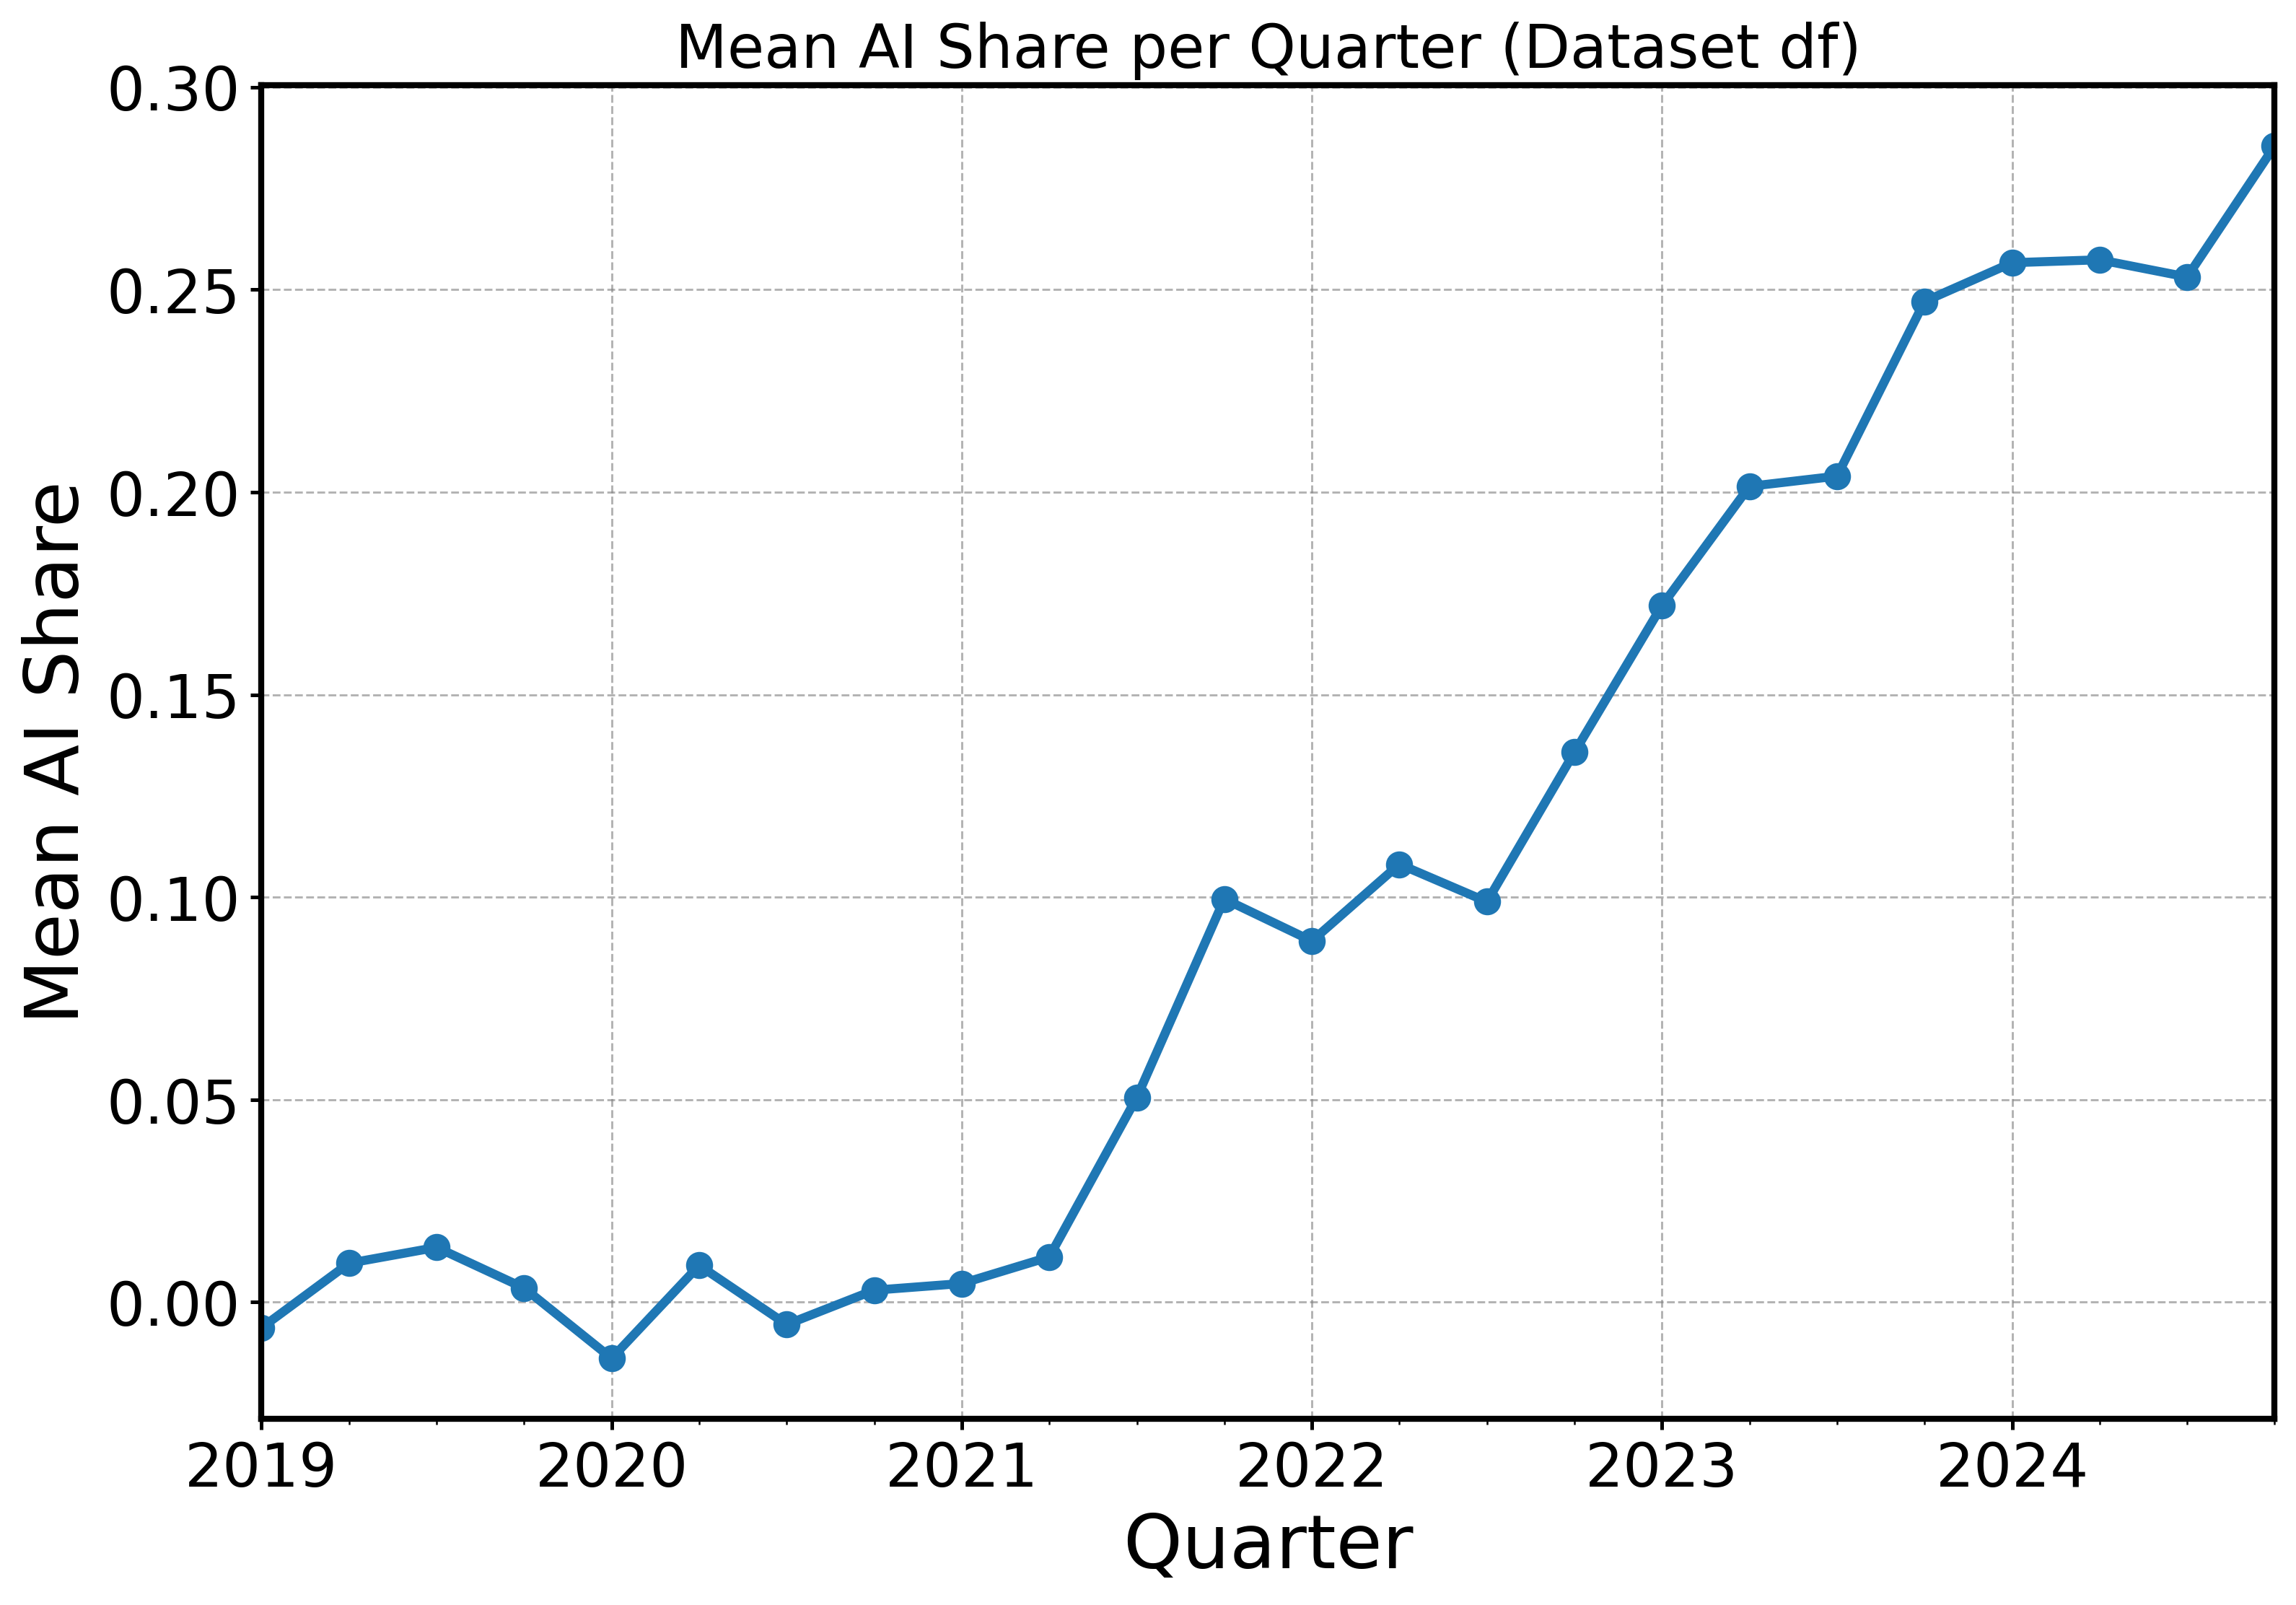

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract quarter from date
df['quarter'] = df['date'].dt.to_period('Q')

# Compute mean AI share per quarter, ignoring NaN
mean_per_quarter_df = df.groupby('quarter')['ai_share'].mean()

# Plot
mean_per_quarter_df.sort_index().plot(
    kind='line',
    marker='o',
    xlabel='Quarter',
    ylabel='Mean AI Share',
    title='Mean AI Share per Quarter (Dataset df)'
)

plt.show()


# 1 ) Country diffusion
 

In [10]:
full_df=pd.read_csv("./final_data/full_countries.csv")
full_df.head()

,country,year,std_error,country_probability
0,china,2019.25,0.022742,-0.004155
1,france,2019.25,0.045466,0.007698
2,germany,2019.25,0.027274,0.008880
3,india,2019.25,0.020454,-0.002693
4,russia,2019.25,0.033498,0.015809


/var/folders/vf/j0ycqyns265108k560b5vrbw0000gn/T/ipykernel_86805/3790044437.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


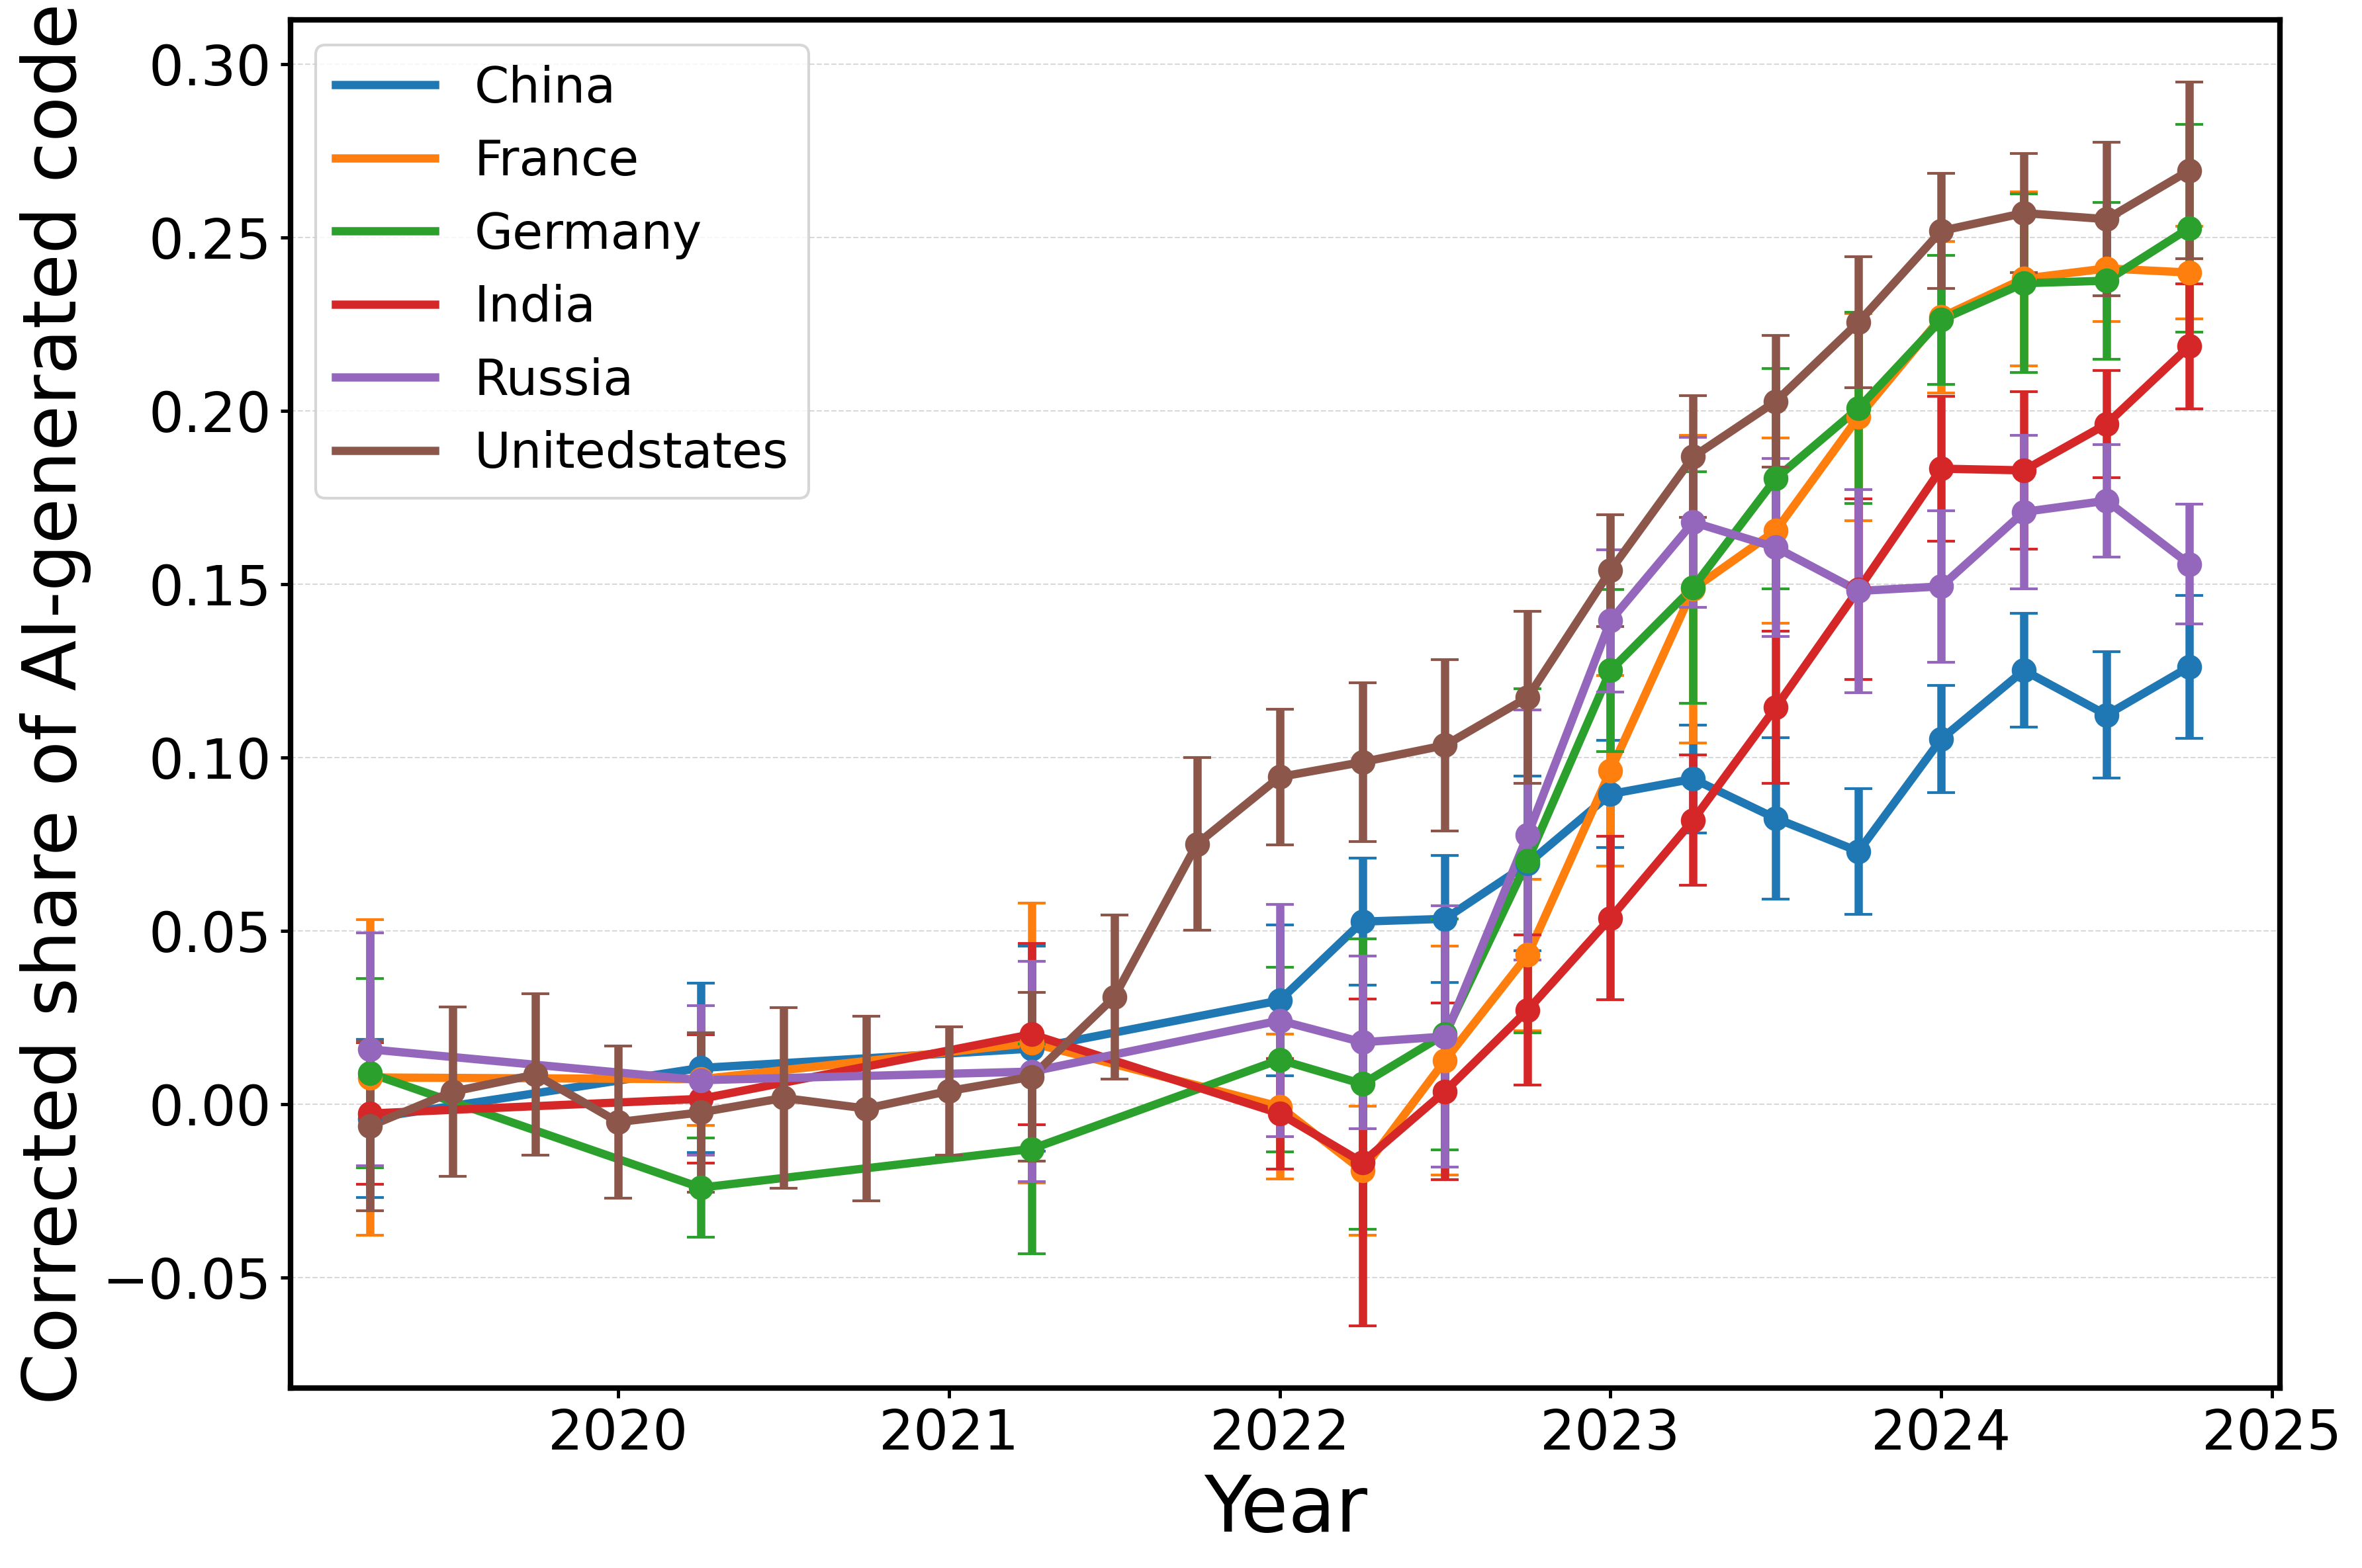

In [ ]:


window_size = 2
colors = plt.cm.get_cmap('tab10', 10)

for idx, country in enumerate(full_df['country'].unique()):
    country_data = full_df[full_df['country'] == country].sort_values('year')

    smoothed_y = (
        country_data['country_probability']
        .rolling(window=window_size, center=True, min_periods=1)
        .mean()
    )

    color = colors(idx)

    plt.plot(
        country_data['year'],
        smoothed_y,
        label=country.title(),
        color=color,
    )

    plt.errorbar(
        country_data['year'],
        smoothed_y,
        yerr=country_data['std_error'],
        fmt='o',
        capsize=5,
        color=color,
    )

plt.xlabel('Year', fontsize=28)
plt.ylabel('Corrected share of AI-generated code', fontsize=27)

ax = plt.gca()
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
ax.xaxis.grid(False)

plt.xlim(left=2019.01)
plt.legend(fontsize=18)
plt.tight_layout()
plt.show()
